# CSCN8010-24W-LAB-6

#### In this lab, I'll be developing a logistic regression model with the Iris dataset to classify Iris flowers as virginica or non-virginica based on their dimensions, aiding decision-making like species identification. I'll collect the dataset, clean it[if required], and scale features before training the model. Using accuracy, we'll evaluate its performance and deploy it for real-time classification, expecting it to enhance decision-making in species identification, streamlining processes across various applications.

#### Importing the packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import warnings

#### Notebook Config

In [2]:
warnings.filterwarnings("ignore") ## Ignore package/modules warnings

#### Loading the iris data

In [3]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Creating a dataframe from the iris dataset

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
# Setting target data which is [0, 1, 2] corresponding to ['setosa', 'versicolor', 'virginica']
df['species'] = data.target
# Also adding target names to the dataframe making it easier to identify the class
df["species_name"] = df.species.apply(lambda x: "virginica" if data.target_names[x] == "virginica" else "non-virginica")
# Convert above target to 1 if the data is for virginica and 0 if it's setosa or versicolor since it's binary classification
df['species'] = df.species.apply(lambda x: 1 if data.target_names[x] == "virginica" else 0)
# Display first 5 rows
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,non-virginica
1,4.9,3.0,1.4,0.2,0,non-virginica
2,4.7,3.2,1.3,0.2,0,non-virginica
3,4.6,3.1,1.5,0.2,0,non-virginica
4,5.0,3.6,1.4,0.2,0,non-virginica
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,virginica
146,6.3,2.5,5.0,1.9,1,virginica
147,6.5,3.0,5.2,2.0,1,virginica
148,6.2,3.4,5.4,2.3,1,virginica


In [5]:
# Checking shape of data
df.shape

(150, 6)

## Exploratory Data Analysis

In [6]:
# Displaying statictics for available numeric data given species are non-virginica
df[df.species == 0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,5.471000,3.099000,2.861000,0.786000,0.0
std,0.641698,0.478739,1.449549,0.565153,0.0
min,4.300000,2.000000,1.000000,0.100000,0.0
25%,5.000000,2.800000,1.500000,0.200000,0.0
50%,5.400000,3.050000,2.450000,0.800000,0.0
75%,5.900000,3.400000,4.325000,1.300000,0.0
max,7.000000,4.400000,5.100000,1.800000,0.0


In [7]:
# Displaying statictics for available numeric data given species are virginica
df[df.species == 1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,1.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,1.0
25%,6.22500,2.800000,5.100000,1.80000,1.0
50%,6.50000,3.000000,5.550000,2.00000,1.0
75%,6.90000,3.175000,5.875000,2.30000,1.0
max,7.90000,3.800000,6.900000,2.50000,1.0


In the given 2 summary tables it can be seen that there are no missing value as count for all columns are same and there are not any obvious signs of outliers. Although there is a mismatch in numbers of both categories by 2:1. 

## Histogram

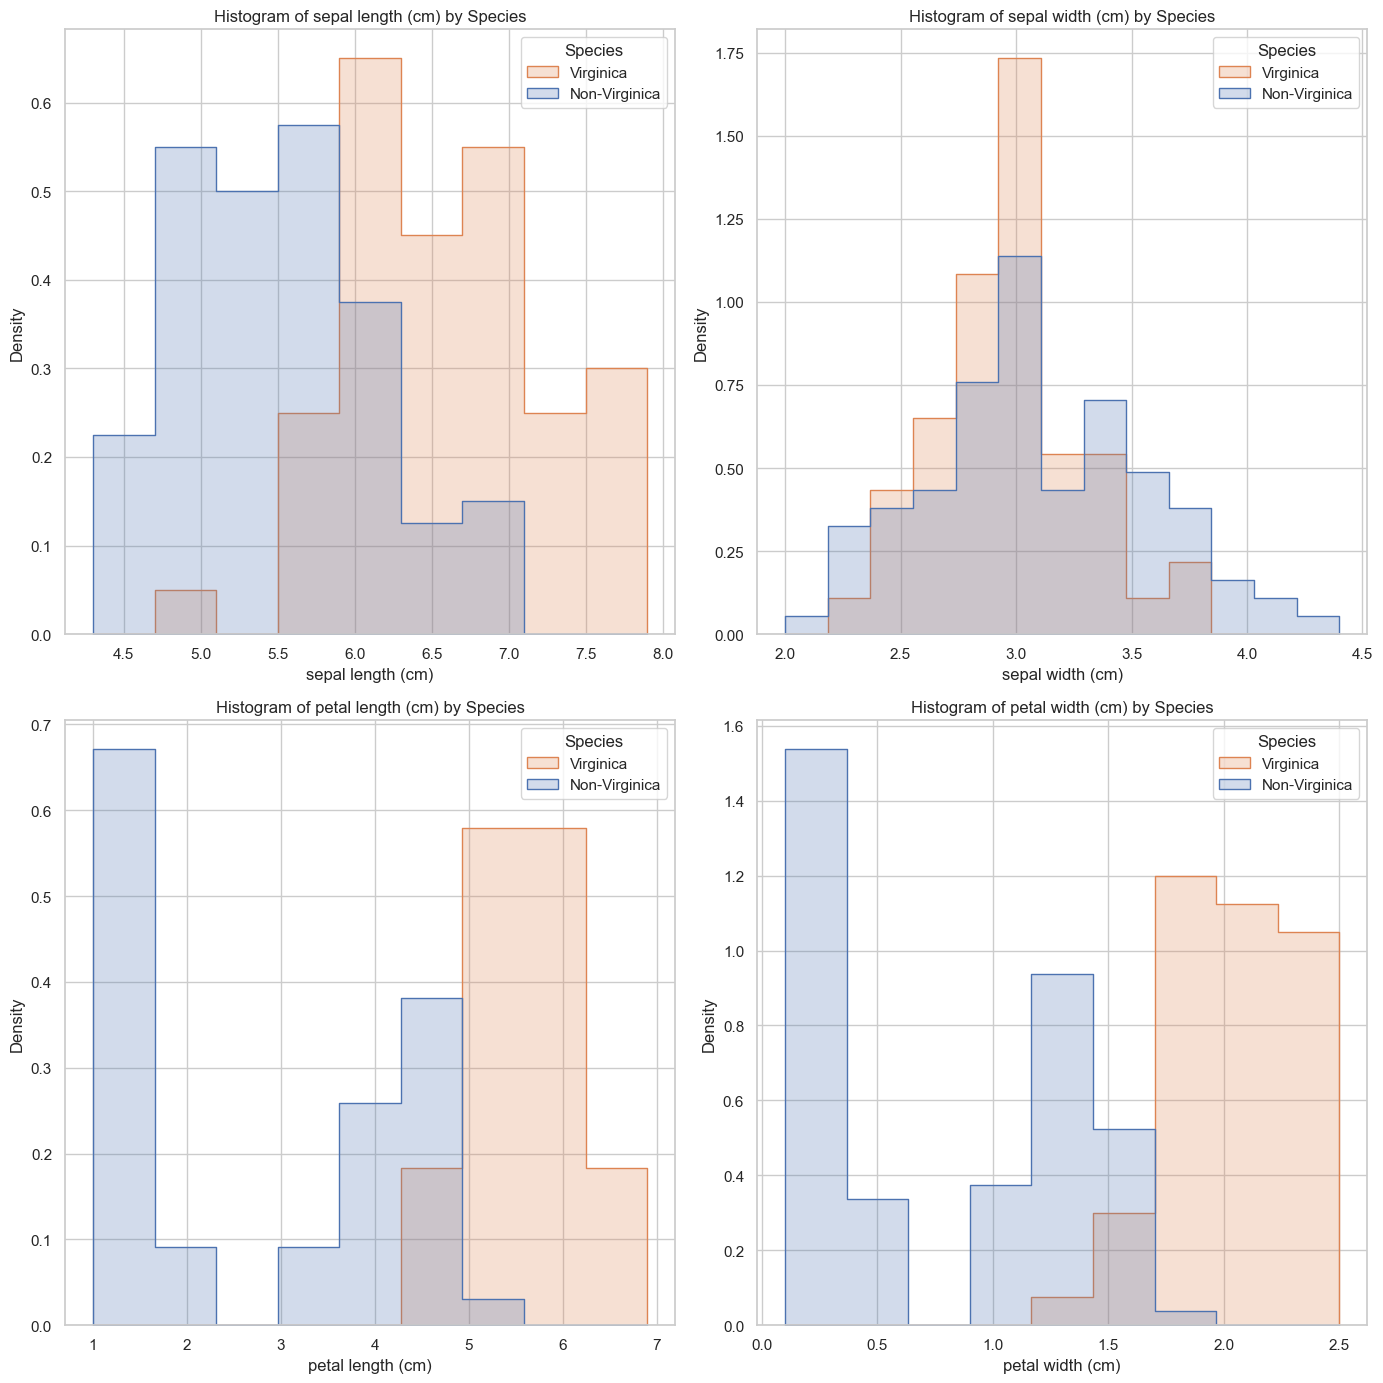

In [8]:
# Set style
sns.set(style="whitegrid")

# Plot histograms for each feature, separated by class in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(data.feature_names):
    sns.histplot(data=df, x=feature, hue='species_name', element="step", stat="density", common_norm=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature} by Species')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend(labels=['Virginica', 'Non-Virginica'], title='Species')

plt.tight_layout()
plt.show()

#### Correlation Matrix

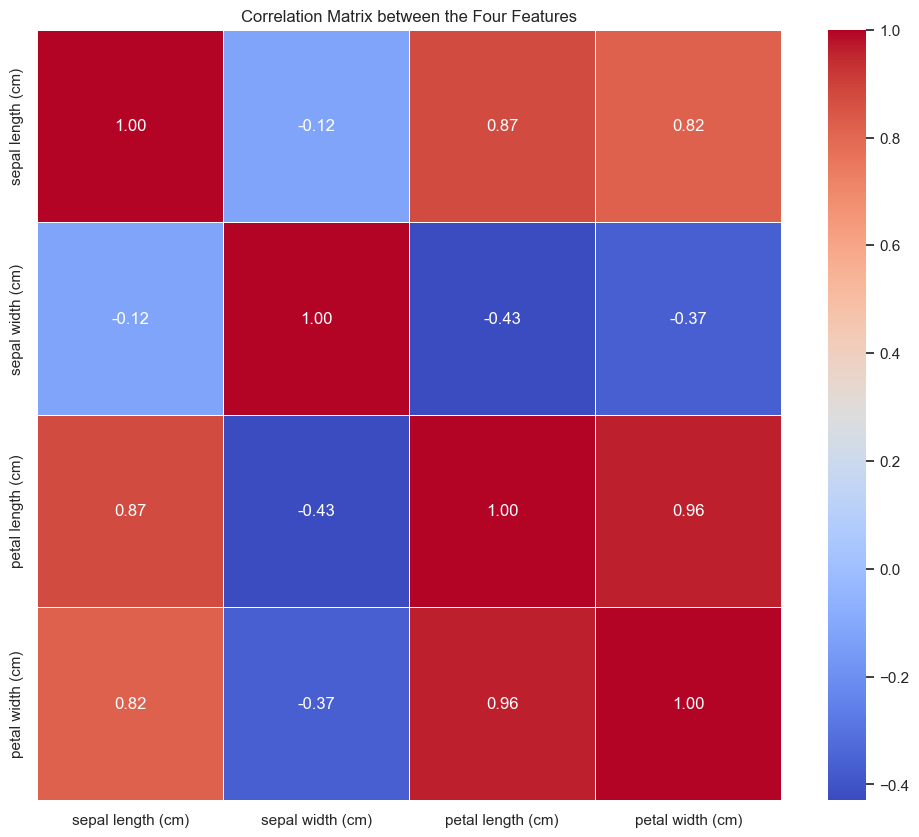

In [9]:
# Calculate correlation matrix
correlation_matrix = df[data.feature_names].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between the Four Features')
plt.show()

The correlation matrix highlights key relationships among the Iris dataset features. Sepal Length strongly correlates with Petal Length (0.87) and Petal Width (0.82), indicating longer sepals tend to have longer and wider petals. Sepal Width shows weaker negative correlations with Sepal Length (-0.12) and Petal Length (-0.43), suggesting wider sepals may accompany shorter lengths. Additionally, Sepal Width and Petal Width exhibit a moderate negative correlation (-0.37), implying wider sepals may correspond to narrower petals. Petal Length strongly correlates with Petal Width (0.96), showing longer petals tend to be wider. These insights offer a concise understanding of feature relationships, aiding in dataset analysis.

#### Scatter plot to show Sepal and petal length and width for both categories

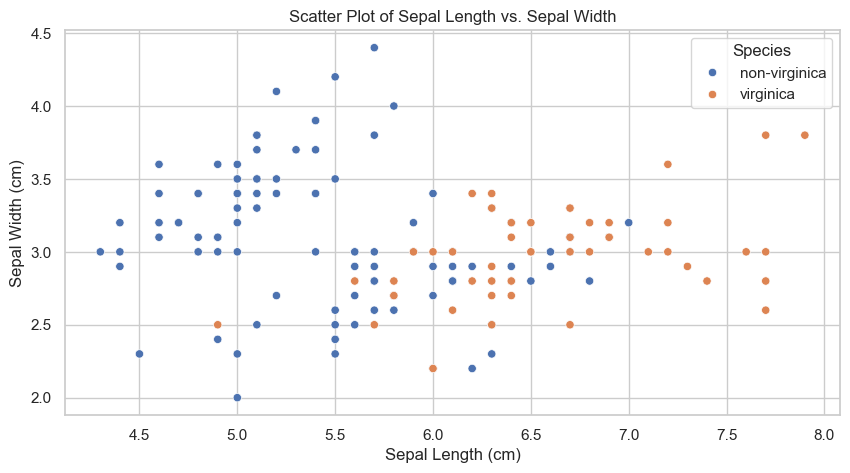

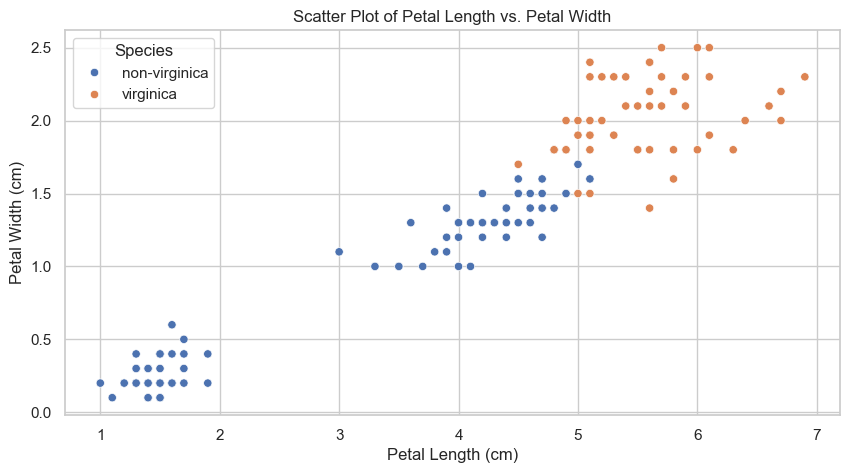

In [10]:
# Scatter plot for sepal length vs. sepal width for both species
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species_name')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

# Scatter plot for petal length vs. petal width for both species
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species_name')
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

#### Scatter plot insights
- It can be seen that Sepal of virginica flower are long but narrow where as other species are shorter but wider. Although there are some overlapping.
- One of the 2 non-virginica species have short and narrow petal where as 2nd non-virginica one have long and wide petals as virginica although proportions for virginica is larger.

#### Bar graph for different flower species

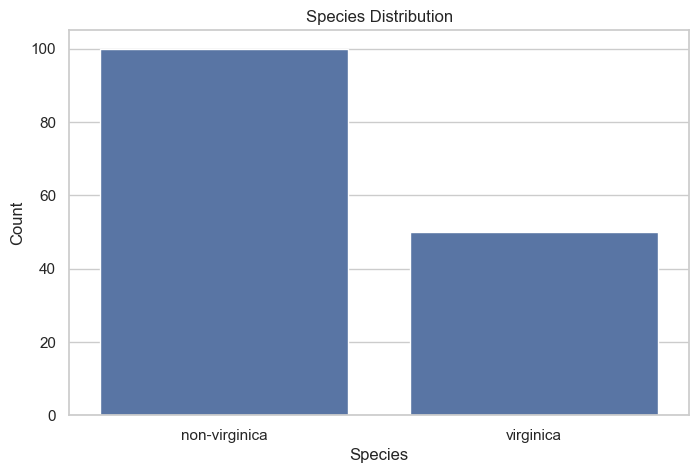

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='species_name')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


In the above bar graph, it can be clearly seen that number of virginica flower are less than non-virginica ones. In ideal case we must balance those entries or reduce the difference to make sure prediction is correct. But this is to be expected in out case as we have converted 3 categories in 2.

#### Box plot for the given dependent variables

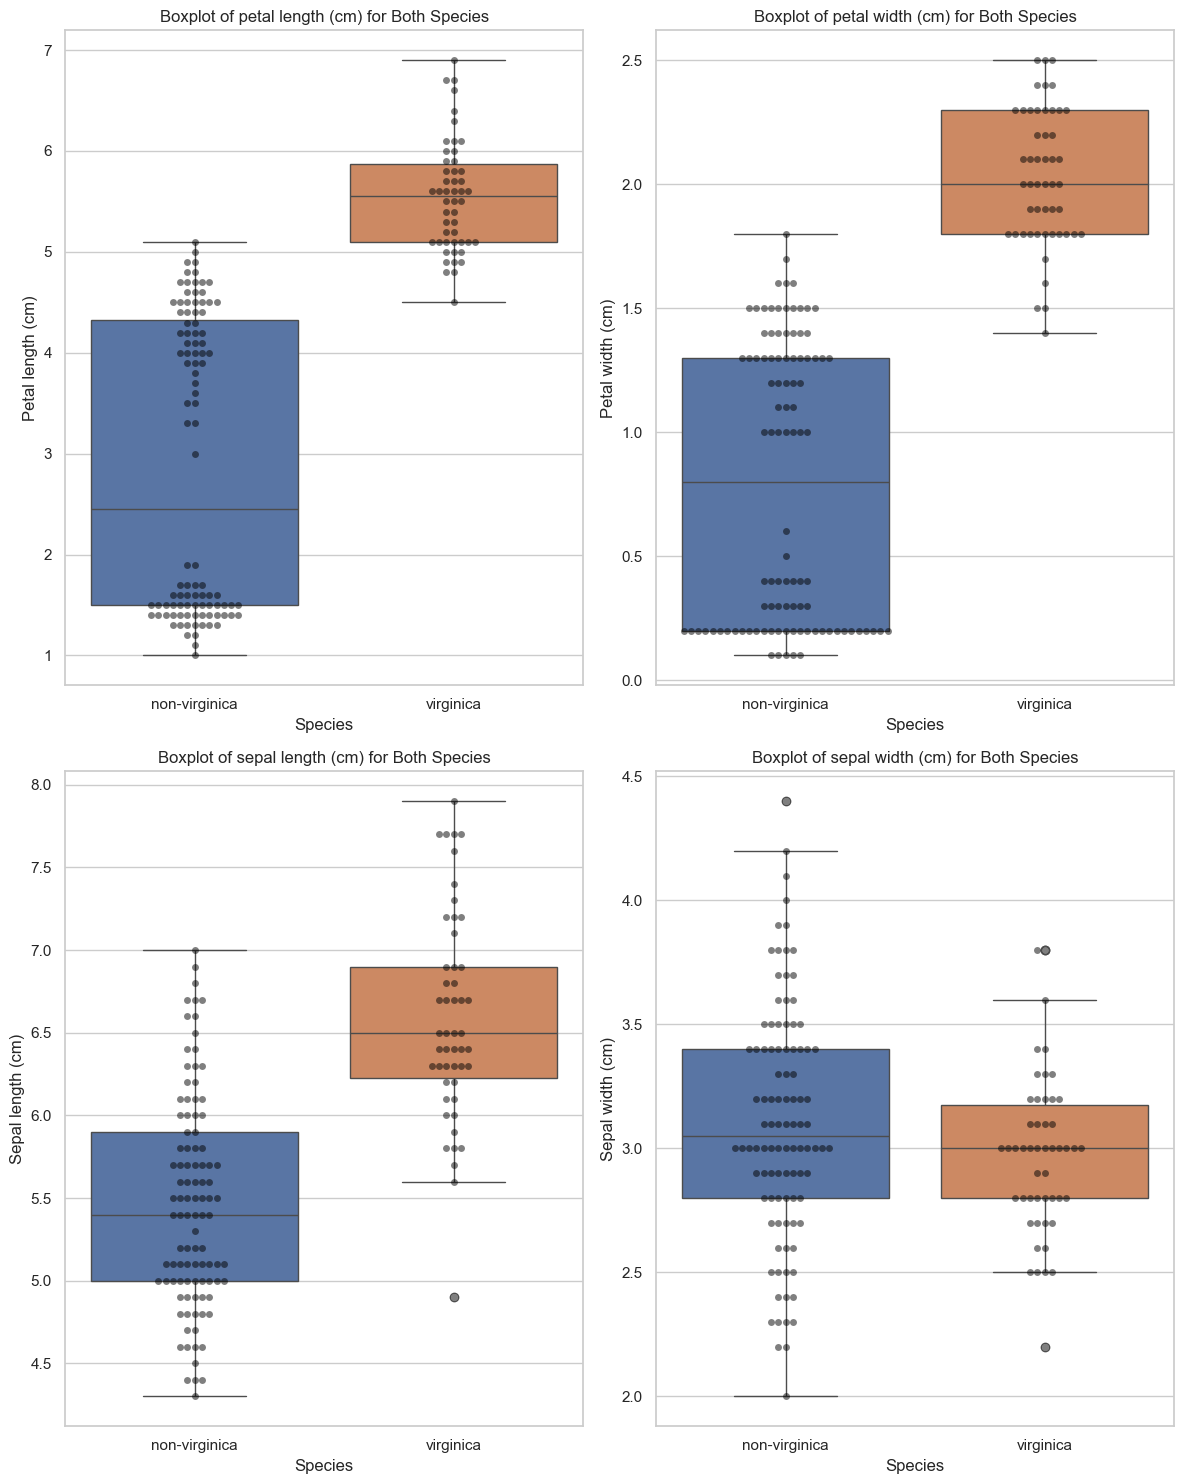

In [12]:
# Create a 2x2 grid of box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Features to plot
features = ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='species_name', y=feature, hue='species_name', ax=axes[i])
    sns.swarmplot(data=df, x='species_name', y=feature, color='black', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} for Both Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

In the given box plot it can be clearly seen the there are some ooutliers present in the data. Since the volume of data is low, we will we ignoring these outliers in today's case.

#### Selecting dependent and independent variable and splitting in train, test and validation dataset

In [13]:
X = df.drop(["species", "species_name"], axis = 1)
Y = df.species # Selecting species over species_name as ml models does not understand textual data
X, Y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

#### Creating train test and validation datasets in 120:15:15 ratio.

In [14]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state= 43)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 43)
X_train.shape, X_test.shape, X_val.shape, Y_train.shape, Y_test.shape, Y_val.shape

((120, 4), (15, 4), (15, 4), (120,), (15,), (15,))

#### Prepration to create and train models with different features and store the performance

In [15]:
# Create a DataFrame to store performance metrics for each model
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

In [16]:
# Detemining features in the notebook
features = X.columns
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

#### Selecting one random feature to create logistic regression

In [17]:
# Selecting one random feature
feature_1 = np.random.choice(features, 1)
# Converting independent variable based on the selected feature
X_train_feature_1 = X_train[feature_1]
X_test_feature_1 = X_test[feature_1]
X_val_feature_1 = X_val[feature_1]

# Training the Logistic Regeression model
model_1_feature = LogisticRegression(max_iter=1000).fit(X_train_feature_1, Y_train)

#Predicting values for the selected model
y_pred_model_1 = model_1_feature.predict(X_val_feature_1)
y_pred_proba_model_1 = model_1_feature.predict_proba(X_val_feature_1)

## Adding model performance data to summary df
accuracy = accuracy_score(Y_val, y_pred_model_1)
precision = precision_score(Y_val, y_pred_model_1)
recall = recall_score(Y_val, y_pred_model_1)
f1 = f1_score(Y_val, y_pred_model_1)
summary_df.loc[len(summary_df)] = {'Model': model_1_feature, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Creating dataframe for model performance
df_model_1 = pd.DataFrame({
        'Instance Number': range(1, len(X_val_feature_1) + 1),
        'Probability (Virginica)': y_pred_proba_model_1[:,1],
        'Predicted': y_pred_model_1,
        'Ground Truth': Y_val
    })

df_model_1.reset_index(inplace=True, drop=True)
df_model_1

,Instance Number,Probability (Virginica),Predicted,Ground Truth
0,1,0.926471,1,1
1,2,0.788029,1,1
2,3,0.002446,0,0
3,4,0.788029,1,1
4,5,0.177258,0,0
5,6,0.059768,0,0
6,7,0.002446,0,0
7,8,0.001630,0,0
8,9,0.059768,0,0
9,10,0.002446,0,0


#### Selecting two random feature to create logistic regression

In [18]:
# Selecting two random feature
feature_2 = np.random.choice(features, 2, replace = False)
# Converting independent variables based on the selected features
X_train_feature_2 = X_train[feature_2]
X_test_feature_2 = X_test[feature_2]
X_val_feature_2 = X_val[feature_2]

# Training the Logistic Regeression model
model_2_feature = LogisticRegression(max_iter=1000).fit(X_train_feature_2, Y_train)

#Predicting values for the selected model
y_pred_model_2 = model_2_feature.predict(X_val_feature_2)
y_pred_proba_model_2 = model_2_feature.predict_proba(X_val_feature_2)

## Adding model performance data to summary df
accuracy = accuracy_score(Y_val, y_pred_model_2)
precision = precision_score(Y_val, y_pred_model_2)
recall = recall_score(Y_val, y_pred_model_2)
f1 = f1_score(Y_val, y_pred_model_2)
summary_df.loc[len(summary_df)] = {'Model': model_2_feature, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Creating dataframe for model performance
df_model_2 = pd.DataFrame({
        'Instance Number': range(1, len(X_val_feature_2) + 1),
        'Probability (Virginica)': y_pred_proba_model_2[:, 1],
        'Predicted': y_pred_model_2,
        'Ground Truth': Y_val
    })

df_model_2.reset_index(inplace=True, drop=True)
df_model_2

,Instance Number,Probability (Virginica),Predicted,Ground Truth
0,1,0.998720,1,1
1,2,0.997412,1,1
2,3,0.000012,0,0
3,4,0.616626,1,1
4,5,0.040770,0,0
5,6,0.016945,0,0
6,7,0.000005,0,0
7,8,0.000006,0,0
8,9,0.004888,0,0
9,10,0.000008,0,0


#### Selecting three random feature to create logistic regression

In [19]:
# Selecting three random feature
feature_3 = np.random.choice(features, 3, replace = False)
# Converting independent variables based on the selected features
X_train_feature_3 = X_train[feature_3]
X_test_feature_3 = X_test[feature_3]
X_val_feature_3 = X_val[feature_3]

# Training the Logistic Regeression model
model_3_feature = LogisticRegression(max_iter=1000).fit(X_train_feature_3, Y_train)

#Predicting values for the selected model
y_pred_model_3 = model_3_feature.predict(X_val_feature_3)
y_pred_proba_model_3 = model_3_feature.predict_proba(X_val_feature_3)

## Adding model performance data to summary df
accuracy = accuracy_score(Y_val, y_pred_model_3)
precision = precision_score(Y_val, y_pred_model_3)
recall = recall_score(Y_val, y_pred_model_3)
f1 = f1_score(Y_val, y_pred_model_3)
summary_df.loc[len(summary_df)] = {'Model': model_3_feature, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Creating dataframe for model performance
df_model_3 = pd.DataFrame({
        'Instance Number': range(1, len(X_val_feature_3) + 1),
        'Probability (Virginica)': y_pred_proba_model_3[:,1],
        'Predicted': y_pred_model_3,
        'Ground Truth': Y_val
    })

df_model_3.reset_index(inplace=True, drop=True)
df_model_3

,Instance Number,Probability (Virginica),Predicted,Ground Truth
0,1,0.999005,1,1
1,2,0.996317,1,1
2,3,0.000004,0,0
3,4,0.757952,1,1
4,5,0.036257,0,0
5,6,0.010408,0,0
6,7,0.000002,0,0
7,8,0.000001,0,0
8,9,0.003540,0,0
9,10,0.000002,0,0


#### Creating logistic regression using all 4 variables

In [20]:
# Since we have 4 independent variables only we don't need to preprocess data in this case
# Training the Logistic Regeression model
model_4_feature = LogisticRegression(max_iter=1000).fit(X_train, Y_train)

#Predicting values for the selected model
y_pred_model_4 = model_4_feature.predict(X_val)
y_pred_proba_model_4 = model_4_feature.predict_proba(X_val)

## Adding model performance data to summary df
accuracy = accuracy_score(Y_val, y_pred_model_4)
precision = precision_score(Y_val, y_pred_model_4)
recall = recall_score(Y_val, y_pred_model_4)
f1 = f1_score(Y_val, y_pred_model_4)
summary_df.loc[len(summary_df)] = {'Model': model_4_feature, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Creating dataframe for model performance
df_model_4 = pd.DataFrame({
        'Instance Number': range(1, len(X_val) + 1),
        'Probability (Virginica)': y_pred_proba_model_4[:,1],
        'Predicted': y_pred_model_4,
        'Ground Truth': Y_val
    })

df_model_4.reset_index(inplace=True, drop=True)
df_model_4

,Instance Number,Probability (Virginica),Predicted,Ground Truth
0,1,0.998792,1,1
1,2,0.995492,1,1
2,3,0.000004,0,0
3,4,0.779315,1,1
4,5,0.034484,0,0
5,6,0.010917,0,0
6,7,0.000002,0,0
7,8,0.000002,0,0
8,9,0.004147,0,0
9,10,0.000002,0,0


#### To summarize the data in each table to a single measure per model, we can calculate a performance metric such as accuracy, precision, recall, or F1-score. These metrics provide insights into different aspects of the model's performance. Let's calcculate all of them for now

> We have already calculated these performance matrices

In [21]:
summary_df

,Model,Accuracy,Precision,Recall,F1-score
0,LogisticRegression(max_iter=1000),0.933333,1.0,0.8,0.888889
1,LogisticRegression(max_iter=1000),0.933333,1.0,0.8,0.888889
2,LogisticRegression(max_iter=1000),1.000000,1.0,1.0,1.000000
3,LogisticRegression(max_iter=1000),0.933333,1.0,0.8,0.888889


#### Now, let’s evaluate which model performs best based on these metrics:

- Accuracy: Model with 3 features  achieved perfect accuracy, but it’s essential to consider other metrics as well.
- Precision: Model 3 features have perfect precision, indicating that they correctly classify positive cases.
- Recall: Model with 3 features also has perfect recall, meaning it identifies all positive cases.
- F1-score: Model with 3 features has the highest F1-score, which balances precision and recall.

Therefore it can be concluded model with 3 features has the best accuracy

#### Plot the decision boundary 

#### Decision boundary for model with 1 feature

In [22]:
decision_boundary = -model_1_feature.intercept_ / model_1_feature.coef_
decision_boundary

array([[1.67727543]])

#### Decision boundary for model with 2 feature

#### Checking for instances where models presented incorrect values

In [23]:
# List to store failure modes for each model
failure_modes = []

model_names = ["model_1_feature", "model_2_feature", "model_3_feature", "model_4_feature"]
Y_predicted_values = [y_pred_model_1, y_pred_model_2, y_pred_model_3, y_pred_model_4]

# Compare predictions with actual labels for each model
for model_name, Y_predicted in zip(model_names, Y_predicted_values):
    failures = [i for i, (pred, actual) in enumerate(zip(Y_predicted, Y_val)) if pred != actual]
    failure_modes.append((model_name, failures))

# Print failure modes for each model
for model_name, failures in failure_modes:
    print(f"Failure modes for {model_name}: {failures}")

Failure modes for model_1_feature: [13]
Failure modes for model_2_feature: [11]
Failure modes for model_3_feature: []
Failure modes for model_4_feature: [11]


Here all modes fail at some point except model wiht 3 features. Although, models can mess up in predictable ways. For instance, they might struggle with outliers or when classes overlap, especially if features don't clearly separate them. Rare classes may be poorly learned, and models might struggle with complex class boundaries. Forgetting key data or errors in the data can also lead to mistakes. Recognizing these patterns helps improve models.

#### Selecting the best model

In [24]:
# Selecting features used for the best model from test data
X_test_updated = X_test[feature_3]

# Make predictions on the test set using model_3_features
Y_pred_test = model_3_feature.predict(X_test_updated)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(Y_test, Y_pred_test)
precision = precision_score(Y_test, Y_pred_test)
recall = recall_score(Y_test, Y_pred_test)

# Print the evaluation metrics
print("Performance of the best model (model_3_features) on the test set:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Performance of the best model (model_3_features) on the test set:
Accuracy: 0.93
Precision: 1.00
Recall: 0.75
